In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
import pandas as pd

In [68]:
import numpy as np

In [69]:
import pycaret as pc

In [70]:
import sklearn as sk

In [71]:
from pycaret.nlp import *

In [72]:
np.__version__

'1.22.3'

In [73]:
pd.__version__

'1.3.5'

In [74]:
pc.__version__

'2.3.10'

In [75]:
sk.__version__

'0.23.2'

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
data = pd.read_csv("./kiva.csv", sep=',', decimal='.', verbose= True, engine='c') 

Tokenization took: 24.03 ms
Type conversion took: 30.81 ms
Parser memory cleanup took: 0.00 ms


In [78]:
data.shape

(6818, 7)

In [79]:
data.head()

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [80]:
data = data.sample(1000, random_state=786).reset_index(drop=True)

In [81]:
data.shape

(1000, 7)

In [82]:
exp_nlp101 = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 101,
                   log_experiment = True,
                   experiment_name = 'EX001')

Description,Value
session_id,101
Documents,1000
Vocab Size,4636
Custom Stopwords,True


### [Evaluate Topic Models: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

### [Evaluating Topic Models](https://www.youtube.com/watch?v=UkmIljRIG_M)

### [Latent Dirichlet Allocation](https://radimrehurek.com/gensim/models/ldamodel.html)

In [83]:
lda = create_model('lda', num_topics = 4, multi_core = True)

In [84]:
print(lda)

LdaModel(num_terms=4636, num_topics=4, decay=0.5, chunksize=100)


In [85]:
lda_results = assign_model(lda)

In [86]:
lda_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.006332,0.006049,0.006104,0.981515,Topic 3,0.98
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,0.005986,0.005826,0.005799,0.982389,Topic 3,0.98
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,0.548234,0.007570,0.007704,0.436493,Topic 0,0.55
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.143933,0.007101,0.007114,0.841852,Topic 3,0.84
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.054610,0.005737,0.005900,0.933753,Topic 3,0.93


In [87]:
plot_model()

In [88]:
plot_model(plot = 'bigram')

In [89]:
plot_model(lda, plot = 'frequency', topic_num = 'Topic 1')

In [90]:
plot_model(lda, plot = 'topic_distribution')

In [91]:
plot_model(lda, plot = 'tsne')

### [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://umap-learn.readthedocs.io/en/latest/index.html)

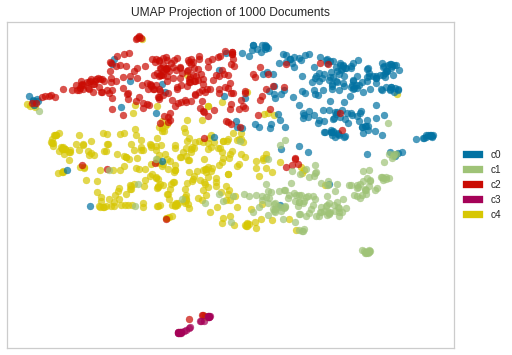

In [92]:
plot_model(lda, plot = 'umap')

In [93]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [94]:
save_model(lda,'./models/NLP01')

Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x7f5213d040a0>,
 './models/NLP01.pkl')

In [95]:
saved_lda = load_model('./models/NLP01')

Model Sucessfully Loaded


In [96]:
print(saved_lda)

LdaModel(num_terms=4636, num_topics=4, decay=0.5, chunksize=100)


In [97]:
#!m/lflow ui 

________________________________

## Using LSI

In [128]:
lsi_setup = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 102,
                   log_experiment = True,
                   experiment_name = 'EX002')

Description,Value
session_id,102
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [129]:
lsi = create_model('lsi', num_topics = 4, multi_core = True)

In [130]:
lsi_results = assign_model(lsi)

In [131]:
lsi_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,1.664025,0.906865,-0.320182,-1.401085,Topic 0
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,1.631785,0.804840,0.424389,0.302907,Topic 0
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,2.422485,0.606354,0.088235,-0.380107,Topic 0
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,1.336820,0.750646,-0.178626,-0.823346,Topic 0
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,1.163863,0.905991,-0.116859,-1.257482,Topic 0


In [132]:
plot_model(lsi)

In [133]:
plot_model(lsi, plot = 'bigram')

In [134]:
plot_model(lsi, plot = 'frequency', topic_num = 'Topic 0')

In [135]:
plot_model(lsi, plot = 'topic_distribution')

In [136]:
plot_model(lsi, plot = 'tsne')

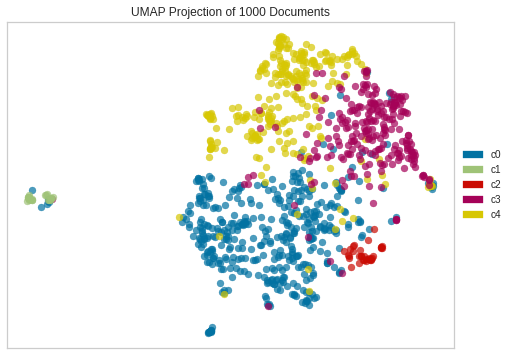

In [137]:
plot_model(lsi, plot = 'umap')

## Using HDP

In [108]:
hdp_setup = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 103,
                   log_experiment = True,
                   experiment_name = 'EX003')

Description,Value
session_id,103
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [109]:
hdp = create_model('hdp', num_topics = 4, multi_core = True)

In [110]:
hdp_results = assign_model(hdp)

In [111]:
hdp_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.986071,0.000000,0.000000,0.000000,Topic 0
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,0.721216,0.271272,0.000000,0.000000,Topic 0
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,0.983211,0.000000,0.000000,0.000000,Topic 0
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,0.744704,0.000000,0.000000,0.243234,Topic 0
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,0.508053,0.189856,0.298672,0.000000,Topic 0


In [112]:
plot_model(hdp)

In [113]:
plot_model(hdp, plot = 'bigram')

In [114]:
plot_model(hdp, plot = 'frequency', topic_num = 'Topic 0')

In [115]:
plot_model(hdp, plot = 'topic_distribution')

In [116]:
plot_model(hdp, plot = 'tsne')

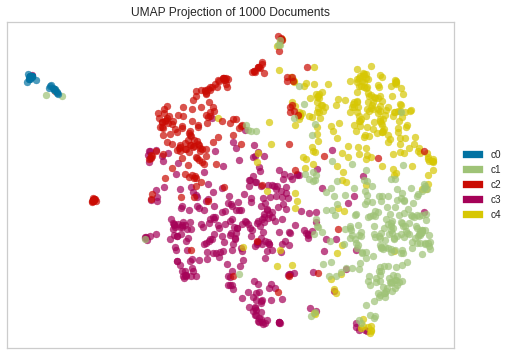

In [117]:
plot_model(hdp, plot = 'umap')

## Using RP

In [118]:
lsi_setup = setup(data = data, 
                   target = 'en', 
                   custom_stopwords = ['loan', 'income', 'usd', 'many', 'also', 'make', 'business', 'buy', 
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'old', 'woman',
                                       'child', 'school'],
                   session_id = 103,
                   log_experiment = True,
                   experiment_name = 'EX004')

Description,Value
session_id,103
Documents,1000
Vocab Size,4636
Custom Stopwords,True


In [119]:
rp = create_model('rp', num_topics = 4, multi_core = True)

In [120]:
rp_results = assign_model(rp)

In [121]:
rp_results.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic
0,Kenya,praxide marry primary train tailor operate sma...,F,75,partner,Services,0,0.5,-4.5,0.5,-5.5,Topic 0
1,Kenya,gynaecology practitioner run live wife biologi...,M,1200,partner,Health,0,4.5,5.5,-5.5,-4.5,Topic 1
2,Dominican Republic,live boy girl range new use clothing support f...,F,150,partner,Clothing,0,-1.0,-5.0,0.0,-2.0,Topic 2
3,Kenya,phanice marry daughter secondary boy primary f...,F,150,lender,Services,1,1.5,0.5,-1.5,3.5,Topic 3
4,Kenya,hotel last get good return competition increas...,F,300,lender,Food,1,-2.5,1.5,-0.5,-1.5,Topic 1


In [122]:
plot_model(rp)

In [123]:
plot_model(rp, plot = 'bigram')

In [124]:
plot_model(rp, plot = 'frequency', topic_num = 'Topic 0')

In [125]:
plot_model(rp, plot = 'topic_distribution')

In [126]:
plot_model(rp, plot = 'tsne')

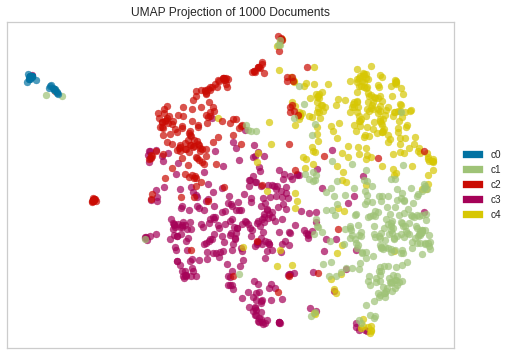

In [127]:
plot_model(rp, plot = 'umap')